<center><font size = "10"> Week 2 - Morphologies <center>
<center><font size = "8">Home work<center>

<font size = "3">Please, write your group number and the names and surnames of the group members here
<br>Group number: 1
<br>Group member1: Gasser Elbanna
<br>Group member2: Louise Placidet
<br>Group member3: Milo Imbeni

# Ex1: Create your favorite neuron

<font size ="3">Write some code that builds a geometrical model of a neuron with one soma, one axon and two dendrites. One dendrite with three branches and the other with four branches. Show the resulting model. [0.5 pts]


|----------|       soma(0-1)
            `---------|       dend1(0-1)
                       `---------|       dend_branch1(0-1)
                       `---------|       dend_branch2(0-1)
                       `---------|       dend_branch3(0-1)
            `---------|       dend2(0-1)
                       `---------|       dend_branch4(0-1)
                       `---------|       dend_branch5(0-1)
                       `---------|       dend_branch6(0-1)
                       `---------|       dend_branch7(0-1)
 `---------|       axon(0-1)

Wrote cell 0 to cell_trial.swc


1.0

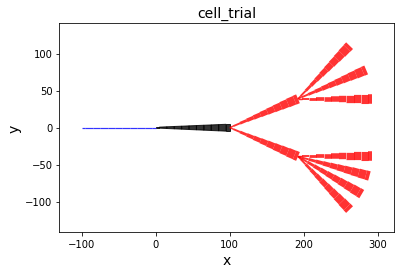

In [60]:
from neuron import h
import neurom as nm
from neurom import viewer
from hoc2swc import neuron2swc
import numpy

# Creating Neuron Sections
soma, dend1, dend2, db1, db2, db3, db4, db5, db6, db7, axon = [h.Section(name=n) for n in ['soma', 'dend1', 'dend2', 'dend_branch1', 'dend_branch2', 'dend_branch3', 'dend_branch4', 'dend_branch5', 'dend_branch6', 'dend_branch7', 'axon']]

# Geometry 
for sec in h.allsec():
    if sec == 'soma':
        sec.L = sec.diam = 15
    else:
        sec.nseg = 10
        sec.L = 100
        for seg in sec:
            seg.diam = numpy.interp(seg.x, [0, 1], [1, 10])

# Connecting Sections
dend1.connect(soma(1))
dend2.connect(soma(1))

db1.connect(dend1(1))
db2.connect(dend1(1))
db3.connect(dend1(1))

db4.connect(dend2(1))
db5.connect(dend2(1))
db6.connect(dend2(1))
db7.connect(dend2(1))

axon.connect(soma(0))
h.topology()
        

neuron2swc('cell_trial.swc', swap_yz=False)
neuron_trial = nm.load_neuron('cell_trial.swc')
viewer.draw(neuron_trial)

# In your laptop
# Visualize in the Neuron GUI
s = h.Shape()
s.show(False)

# Ex2: Visualizing neurons

<font size ="3">Select one of the neurons from your group data set. Write a code that visualize the neuron oriented on the three possible planes (xy, xz and yz), and in 3D, and plot each of its neurites (the neurites only need to be plotted in a single plane). Represent everything in the same plot (subplot). The main title of the figure should be the cell name. The subplots should have also their title (for example: 'plane xy' or 'neurite 2') and the axes of each subplot should be labeled. [1.5 pts]

Text(0.5,0.98,'morph_03')

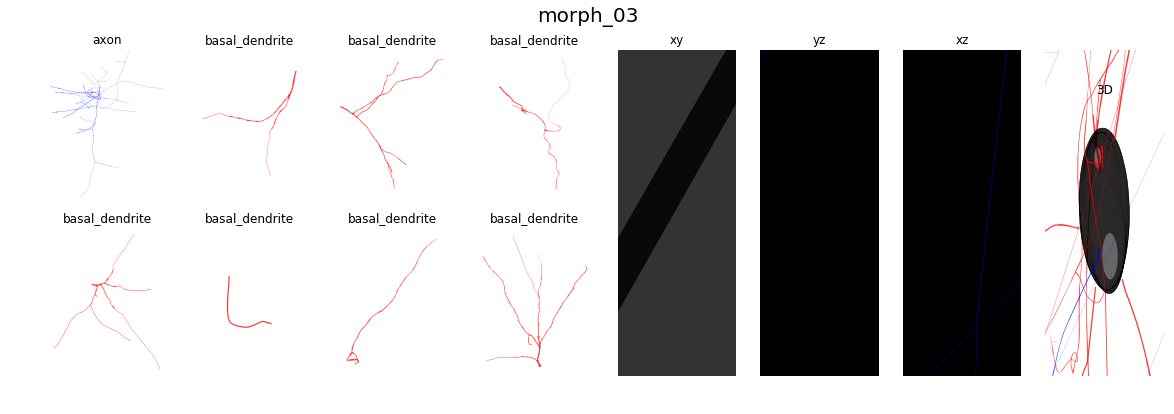

In [50]:
import neurom as nm
from neurom import viewer
from neurom.view import view
from neurom.view.common import update_plot_limits
import matplotlib.pyplot as plt

nrn = 'Group_01/00/morph_03.swc'
neuron = nm.load_neuron(nrn)
neurites = neuron.neurites

# Plot each of the neurites separately
# N = len(neurites) + 3
planes = ['xy', 'yz', 'xz']


# fig,_ = viewer.draw(neuron, mode='2d', plane='xz')
# print(type(fig))
f = plt.figure(figsize=(20, 6))

axes = f.add_subplot(1, 8, 8, projection='3d')
nm.viewer.plot_neuron3d(axes, neuron)
axes.axis('off')
axes.set_title('3D')


for i, plane in enumerate(planes):
    axes = f.add_subplot(1, 8, i+5)
    nm.viewer.plot_neuron(axes, neuron, plane=plane)
    axes.axis('off')
    axes.set_title(str(plane))

for i, neurite in enumerate(neurites):
    if i < 4:
        current_axes = f.add_subplot(2, 8, i+1)
    else:
        current_axes = f.add_subplot(2, 8, i+5)
    view.plot_tree(current_axes, neurite, plane='xy')
    update_plot_limits(current_axes, white_space=10)
    # remove the xy axes for a prettier result
    current_axes.axis('off')
    # remove the title for each subplot
    current_axes.set_title(str(neurite.type).split('.')[1])

# set a global title for the figure
f.suptitle(neuron.name, fontsize=20)

# Ex3: Check your set of morphologies for mistakes

<font size = "3">Work with the morphology files that correspond to your group, some of them are good morphology files and some have mistakes. Write down which files have errors, enumerate the errors in each file. You can use or copy here the code on Week2_Morphologies_CheckErrors_tut02.ipynb. Explain, on your own words, what each of these errors means, and give some ideas about how would you correct the mistakes from your bad morphology files. [1.5 pts]

# Ex4: Morphometrics

<font size = "3">Now that you know which cells, out of your set of cells, are morphologically correct its time to analyze some characteristics of them. 

<font size = "3">Compute some morphometric characteristics of all the cells in your cell set that have no mistakes. Represent the result of all the cells using histograms. Find the morphometric charachteristics that best enable you to classify the cells into different groups. Would using a combination of morphometric characteristics improve the classification? Plot the results in a scatter plot[2.5 pts]

<font size = "3">__IMPORTANT:__ as we have seen in the lecture, neurons have very different shapes. Some of them may even missed some parts that other neurons have, but this doesn't mean that their reconstruction is wrong. 

<font size = "3">Use the information given on the following papers to help you answer Ex3 and Ex4.

<font size = "3">[paper 1](https://www.nature.com/articles/nrn1519.pdf) 
    
<font size = "3">[paper 2](https://www.nature.com/articles/nrn2402.pdf)
    
<font size = "3">[paper 3](https://watermark.silverchair.com/bhy339.pdf?token=AQECAHi208BE49Ooan9kkhW_Ercy7Dm3ZL_9Cf3qfKAc485ysgAAAnwwggJ4BgkqhkiG9w0BBwagggJpMIICZQIBADCCAl4GCSqGSIb3DQEHATAeBglghkgBZQMEAS4wEQQMjL2dxX4XnctI8PSkAgEQgIICL871rzxAccwBPnWDWJYXnmhez2c206RYVCnDmVVfJdui3Y0__27wwcSCeSvs8bMO-ySrUsntk8bkKC0g0_2zqK9F-IRlkpL4X120sWQoyjsnZSRgpQgBRjhTGqEiQFSv6VpT1NS7tw8Ytgz0nxRzd6uVmAJmm4hA3Qt6xerIeKCuUP2LZhWFPCkCqY9Z6vrTWs31nKibrYQyhfebtfrjQUXZM41f-jg19pGQW353OY8X8EHbnlzljAF25bPO1dFcoJ9z1YrIavhUJvrC_ROcrQ_xFpf43nLKtv44PxSR8ynIh1W87NKQjMy09q_SeEqL2rQcbMm_GxJp11_T39iAZeoghTOsj9nbJM1DcZ_EHiPDUimGWP-zX3GgPa5OFMYDW99UlS7aoEhLUMeNOagm1McT8U3SYyKYUSmKuWbxSE4vzzl6i4kfVTZinPCc2pJUO7foA11nzp8Od-BadQFDv4oC306nDSWJWe62Y4qbGmzR4MLnO_Gunf9wmszwyNHckn81sxPmTBmnTKYkYNJLUGjZFluRgw_Ssjvk42kBawDJ338-CdN0zTm7paxSSDTu32ZKLLaEjchehmkt5ecY3qn5cNXgAo-BGoMDN2Cl9h5F_NZlR4vTg2B3vRKKmKfjt1tLqoG8K4FrO3LNE8cmCZ-f3iFGSeDOD_VMFb5O0q68uqnlfRN6Ep56WChWSWRS92wNhGx7rUQAOvK7dJWK7oIPaxXBh55_RpZn2BQI0WQ)